In [2]:
import requests
import json
import pandas as pd
import matplotlib
%matplotlib inline

### Percent of COVID-19 tests positive by date,
### from Ohio CDC data.  (outliers and null rejected)

In [11]:
load_from_file=False
save_data=False

def pull_data():
    result = requests.get("https://covidtracking.com/api/states/daily")
    return json.loads(result.content)

if load_from_file:
    try:
        with open('data_pull.json','r') as fp:
            data = json.load(fp)
    except:
        data = pull_data()
else:
    data=pull_data()


if save_data:
    with open('data.json','w') as fp:
        fp.writelines(json.dumps(data,indent=4))

In [12]:
state='OH'

<ipython-input-13-e125bf24374b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['percentPositive'] = df2['percentPositive'].abs()*100


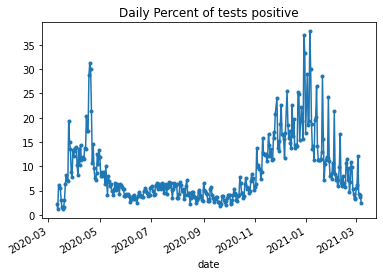

In [13]:
#result = requests.get("https://covidtracking.com/api/states/daily")
#data = json.loads(result.content)
df = pd.DataFrame([ d for d in data if d['state']==state])
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')
df = df.set_index('date')

df['percentPositive'] =  df.positiveIncrease / df.totalTestResultsIncrease

notNullorOneorZero =  ~df['percentPositive'].isnull() & (df['percentPositive']!=1) & (df['percentPositive']!=0)
notTooBig = ~(df['percentPositive'] > .5)

df2 = df[ notNullorOneorZero & notTooBig ] 

df2['percentPositive'] = df2['percentPositive'].abs()*100
notTooBig = ~(df2['percentPositive'] > 50)

#df_percent = df2.loc[:,'percentPositive']
a1 = df2[notTooBig].percentPositive.plot(marker='.',title='Daily Percent of tests positive')
a1.figure.savefig('percent',dpi=100)

In [14]:
df2.totalTestResultsIncrease[:10]

date
2021-03-07    29289
2021-03-06    40190
2021-03-05    43131
2021-03-04    43325
2021-03-03    16741
2021-03-02    27879
2021-03-01    26079
2021-02-28    36196
2021-02-27    54040
2021-02-26    45771
Name: totalTestResultsIncrease, dtype: int64

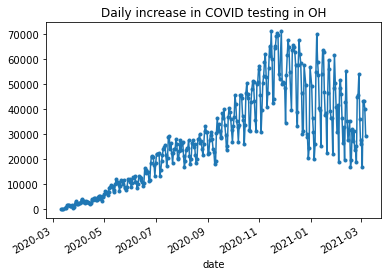

In [15]:
a2 = df2.totalTestResultsIncrease.plot(marker='.',title=f'Daily increase in COVID testing in {state}')
a2.figure.savefig('testing',dpi=100)

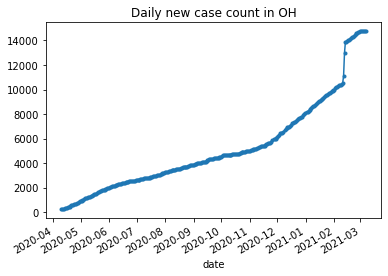

In [16]:
df2.deathConfirmed.plot(marker='.',title=f'Daily new case count in {state}')

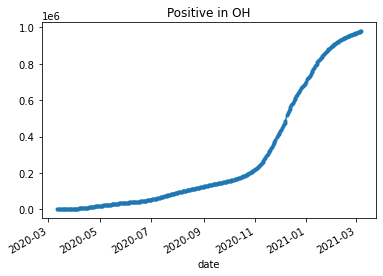

In [17]:
df2.positive.plot(marker='.',title=f'Positive in {state}')

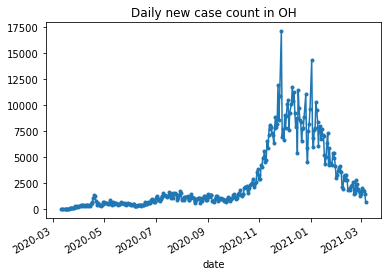

In [18]:
a3 = df2.positiveIncrease.plot(marker='.',title=f'Daily new case count in {state}')
a2.figure.savefig('new_cases',dpi=100)

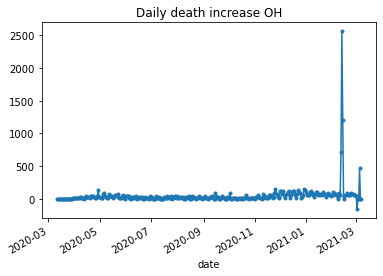

In [19]:
a4 = df2.deathIncrease.plot(marker='.',title=f'Daily death increase {state}')
a4.figure.savefig('daily_deaths',dpi=100)

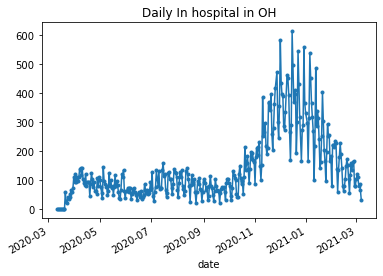

In [20]:
a4 = df2.hospitalizedIncrease.plot(marker='.',title=f'Daily In hospital in {state}')
a4.figure.savefig('in_hospital',dpi=100)

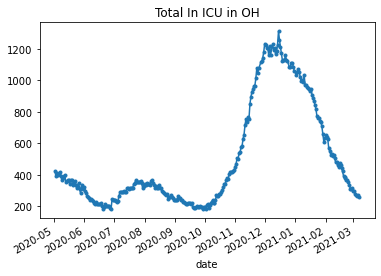

In [21]:
a4 = df2.inIcuCurrently.plot(marker='.',title=f'Total In ICU in {state}')
a4.figure.savefig('in_ICU',dpi=100)

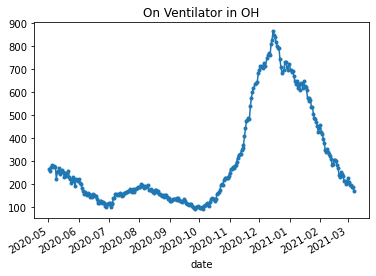

In [22]:
a4 = df2.onVentilatorCurrently.plot(marker='.',title=f'On Ventilator in {state}')
a4.figure.savefig('Total on Ventilator',dpi=100)

In [23]:
cols = ['totalTestResultsIncrease','positiveIncrease','percentPositive']
cols = ['percentPositive']
df3 = df2[cols]

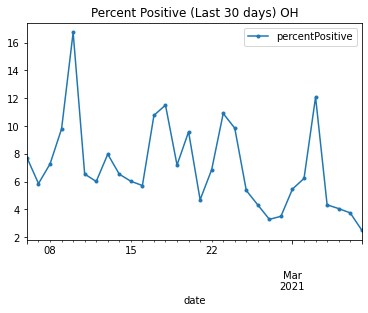

In [24]:
a6 = df3[:30].plot(marker='.',title=f'Percent Positive (Last 30 days) {state}')

In [25]:
df3.head(7)

,percentPositive
date,
2021-03-07,2.509475
2021-03-06,3.747201
2021-03-05,4.057407
2021-03-04,4.327755
2021-03-03,12.078132
2021-03-02,6.226909
2021-03-01,5.464167


In [26]:
df.head(10)

,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,percentPositive
date,,,,,,,,,,,,,,,,,,,,,
2021-03-07,OH,978471,142113.0,None,NaN,totalTestsViral,10257157.0,820.0,50881.0,260.0,...,0,33,b32fec674723dd2c970e0f0c05036a44be63b80b,0,0,0,0,0,,0.025095
2021-03-06,OH,977736,141880.0,None,NaN,totalTestsViral,10227868.0,922.0,50848.0,273.0,...,0,66,c3ebb2b67c649a73dfcab69398eded76d063b695,0,0,0,0,0,,0.037472
2021-03-05,OH,976230,141373.0,None,NaN,totalTestsViral,10187678.0,919.0,50782.0,266.0,...,467,87,72883aea2ad7bbe75e6d347c1c13f7c8c1804d67,0,0,0,0,0,,0.040574
2021-03-04,OH,974480,140708.0,None,NaN,totalTestsViral,10144547.0,1009.0,50695.0,270.0,...,0,82,1f1ed4eba1447fbe405b733767d3af88366886c9,0,0,0,0,0,,0.043278
2021-03-03,OH,972605,140103.0,None,NaN,totalTestsViral,10101222.0,1081.0,50613.0,279.0,...,0,110,bf36efa8adc7998cf90a7f9a31b49d8b8a45d82a,0,0,0,0,0,,0.120781
2021-03-02,OH,970583,139254.0,None,NaN,totalTestsViral,10084481.0,1131.0,50503.0,295.0,...,-157,121,a1dcd965ff75464ebec717fe12f4c8a781210286,0,0,0,0,0,,0.062269
2021-03-01,OH,968847,138592.0,None,NaN,totalTestsViral,10056602.0,1181.0,50382.0,295.0,...,49,103,f40fc0e9058162e2a81e51d9950b513b90a94355,0,0,0,0,0,,0.054642
2021-02-28,OH,967422,137992.0,None,NaN,totalTestsViral,10030523.0,1149.0,50279.0,316.0,...,60,82,7394795576e22fae99c6ecf8f470626609a65d72,0,0,0,0,0,,0.035031
2021-02-27,OH,966154,137684.0,None,NaN,totalTestsViral,9994327.0,1204.0,50197.0,313.0,...,54,79,1acb2db5451741ea6e5a16467b26378251538817,0,0,0,0,0,,0.032828
